In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.datasets import load_iris
from sklearn.preprocessing import label_binarize

## Cargar el dataset Iris

In [3]:
# Cargar el dataset Iris
iris = load_iris()
X = pd.DataFrame(iris.data, columns=iris.feature_names)
y = pd.Series(iris.target)

## Dividir los datos en conjuntos de entrenamiento y prueba


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Crear el modelo

In [5]:
model = LogisticRegression(max_iter=200)

## Entrenar el modelo

In [6]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

## Realizar predicciones

In [8]:
y_pred = model.predict(X_test)
y_pred

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 0, 2, 1, 0, 0, 0, 2, 1, 1, 0,
       0])

## Evaluar el modelo

In [11]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Precisión del modelo: {accuracy:.2f}")
print("Matriz de confusión:")
print(conf_matrix)
print("Reporte de clasificación:")
print(class_report)

Precisión del modelo: 1.00
Matriz de confusión:
[[19  0  0]
 [ 0 13  0]
 [ 0  0 13]]
Reporte de clasificación:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



### Mostrar los coeficientes del modelo y gráfica de la matriz de confusión


Coeficientes del modelo (importancia de características):
sepal length (cm): [-0.40538561  0.4664269  -0.06104129]
sepal width (cm): [ 0.86892188 -0.37487908 -0.4940428 ]
petal length (cm): [-2.277875   -0.18745251  2.46532752]
petal width (cm): [-0.95680118 -0.72127094  1.67807213]


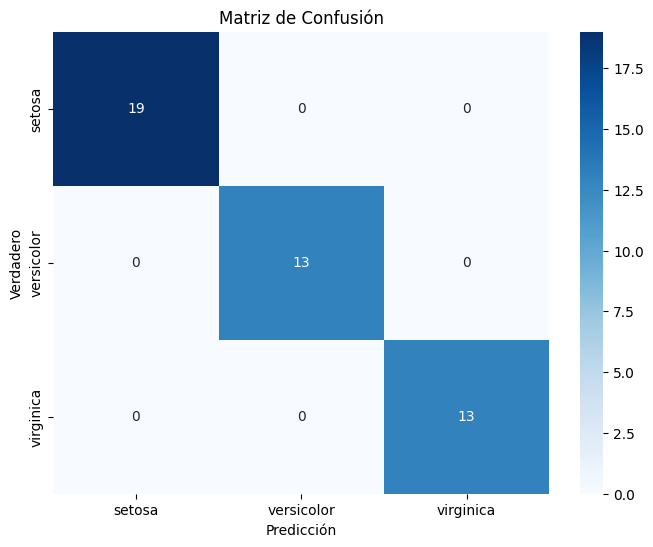

In [12]:
# Mostrar los coeficientes del modelo
print("\nCoeficientes del modelo (importancia de características):")
for col, coef in zip(X.columns, model.coef_.T):
    print(f"{col}: {coef}")

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d", xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.xlabel("Predicción")
plt.ylabel("Verdadero")
plt.title("Matriz de Confusión")
plt.show()

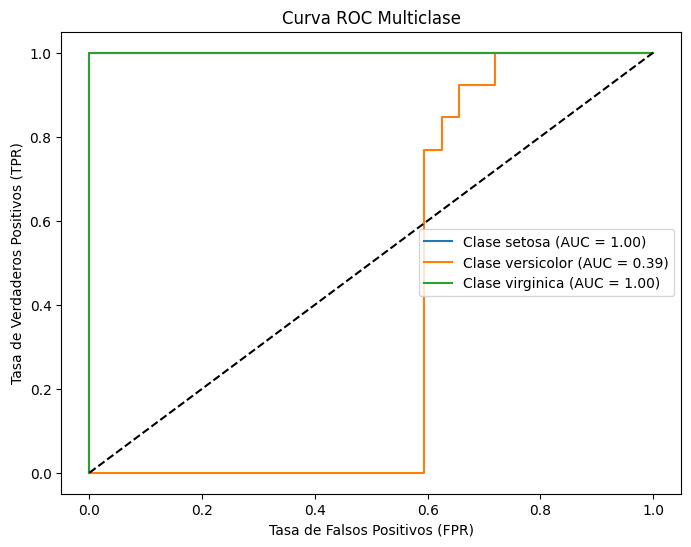

In [13]:
# Graficar la curva ROC para cada clase
y_test_binarized = label_binarize(y_test, classes=[0, 1, 2])
y_score = model.decision_function(X_test)

# Crear la curva ROC y calcular el AUC para cada clase
plt.figure(figsize=(8, 6))
for i in range(3):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    auc_score = roc_auc_score(y_test_binarized[:, i], y_score[:, i])
    plt.plot(fpr, tpr, label=f'Clase {iris.target_names[i]} (AUC = {auc_score:.2f})')

plt.plot([0, 1], [0, 1], 'k--')  # Línea diagonal de referencia
plt.xlabel("Tasa de Falsos Positivos (FPR)")
plt.ylabel("Tasa de Verdaderos Positivos (TPR)")
plt.title("Curva ROC Multiclase")
plt.legend()
plt.show()